In [1]:
# -*- coding: utf-8 -*-
"""
# News about Turkey: Sentiment Analysis in Foreign Press

This Google Colab notebook provides a simple workflow for analyzing the sentiment of news articles about Turkey from various international outlets.
It uses the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is suitable for general English text.

## Dataset: News about Turkey from BBC, CNN, The Guardian, and FOX
Link: https://www.kaggle.com/datasets/muratiik/news-about-turkey-from-bbc-cnn-tg-and-fox

**Instructions:**
1.  **Run each cell sequentially.**
2.  **Upload your dataset:** After running the "Install Libraries and Download NLTK Data" cell, you will be prompted to upload the `Turkey_News.csv` file from the Kaggle dataset to your Colab environment.
3.  **Adjust column names:** Make sure to update `TEXT_COLUMN` and `DATE_COLUMN` variables in their respective cells with the actual column names from your CSV file.

"""

# %% [markdown]
# ### Cell 1: Install Libraries and Download NLTK Data
# This cell installs all required Python libraries and downloads necessary NLTK data for text processing and sentiment analysis.

# %%
# Install necessary libraries
# This will install pandas for data manipulation, nltk for text processing,
# matplotlib and seaborn for visualizations, and vaderSentiment for sentiment analysis.
!pip install pandas matplotlib seaborn nltk vaderSentiment

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK data (stopwords and wordnet for lemmatization)
# You only need to run these once.
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('wordnet')
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('vader_lexicon')

print("Libraries installed and NLTK data downloaded!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Libraries installed and NLTK data downloaded!


In [2]:
# %% [markdown]
# ### Cell 2: Upload and Load Dataset
# This cell handles uploading your `Turkey_News.csv` file from your local machine to the Colab environment and then loads it into a pandas DataFrame.

# %%
# Upload the dataset
# You will be prompted to upload the 'Turkey_News.csv' file from your local machine.
# Click the "Choose Files" button and select the CSV file.
from google.colab import files
uploaded = files.upload()

# Get the filename from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Load the dataset into a pandas DataFrame
# The dataset is expected to be named 'Turkey_News.csv'
# If your uploaded file has a different name, change 'file_name' accordingly.
try:
    df = pd.read_csv(file_name)
    print(f"\nDataset '{file_name}' loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    df.info()
except Exception as e:
    print(f"Error loading the dataset: {e}")
    print("Please make sure the file is named 'Turkey_News.csv' or adjust the 'file_name' variable if needed.")

Saving Turkey_News.csv to Turkey_News.csv

Dataset 'Turkey_News.csv' loaded successfully!
First 5 rows of the dataset:
  newsSource keywords                                              title  \
0        bbc  TURKIYE                             Turkey country profile   
1        bbc  TURKIYE  Turkey earthquake: Before and after pictures s...   
2        bbc  TURKIYE  Turkey earthquake: Deadly new tremor traps peo...   
3        bbc  TURKIYE  Turkey earthquake: Death toll could increase e...   
4        bbc  TURKIYE  Turkey earthquake: Erdogan announces three-mon...   

                                             content  \
0  Once the centre of the Ottoman Empire the mode...   
1  Two huge earthquakes and a series of aftershoc...   
2  WATCH: Dashcam footage shows moment of new Tur...   
3  Dramatic social media footage from first quake...   
4  Turkey and Syria earthquake: Drone footage sho...   

                                             authour         date  \
0                 

In [3]:
# %% [markdown]
# ### Cell 3: Data Preprocessing
# This cell defines and applies a text preprocessing function to clean your news article text, preparing it for sentiment analysis.
#
# **IMPORTANT:** The `TEXT_COLUMN` variable has been updated to `'content'` based on your dataset's available columns.

# %%
# IMPORTANT:
# The TEXT_COLUMN has been updated to 'content' as per your dataset's available columns.
TEXT_COLUMN = 'content' # UPDATED: Changed from 'article' to 'content'

# Check if the specified text column exists
if TEXT_COLUMN not in df.columns:
    print(f"Error: Column '{TEXT_COLUMN}' not found in the dataset.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please update the 'TEXT_COLUMN' variable with the correct column name for article text.")
else:
    # Define a text preprocessing function
    # This function will:
    # - Convert text to lowercase
    # - Remove URLs
    # - Remove numerical digits
    # - Remove punctuation
    # - Remove common English stopwords
    # - Perform lemmatization (reducing words to their base form)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        if not isinstance(text, str): # Handle potential non-string values (e.g., NaN)
            return ""
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
        text = re.sub(r'\d+', '', text) # Remove digits
        text = re.sub(r'[^\w\s]', '', text) # Remove punctuation, but keep words and spaces
        text = ' '.join([word for word in text.split() if word not in stop_words])
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
        return text

    # Apply preprocessing to the chosen text column
    df['cleaned_text'] = df[TEXT_COLUMN].apply(preprocess_text)
    print(f"\nText from '{TEXT_COLUMN}' column preprocessed and stored in 'cleaned_text'.")
    print("Sample of cleaned text:")
    print(df[['newsSource', TEXT_COLUMN, 'cleaned_text']].head()) # Using 'newsSource' for display


Text from 'content' column preprocessed and stored in 'cleaned_text'.
Sample of cleaned text:
  newsSource                                            content  \
0        bbc  Once the centre of the Ottoman Empire the mode...   
1        bbc  Two huge earthquakes and a series of aftershoc...   
2        bbc  WATCH: Dashcam footage shows moment of new Tur...   
3        bbc  Dramatic social media footage from first quake...   
4        bbc  Turkey and Syria earthquake: Drone footage sho...   

                                        cleaned_text  
0  centre ottoman empire modern secular republic ...  
1  two huge earthquake series aftershock hit turk...  
2  watch dashcam footage show moment new turkey e...  
3  dramatic social medium footage first quake hit...  
4  turkey syria earthquake drone footage show tur...  


In [4]:
# %% [markdown]
# ### Cell 4: Sentiment Analysis
# This cell performs sentiment analysis on the preprocessed text using VADER and categorizes the sentiment into Positive, Negative, or Neutral.

# %%
if TEXT_COLUMN in df.columns: # Only proceed if text column was found in previous step
    # Initialize VADER SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()

    # Define a function to get VADER compound sentiment score
    # The compound score is a normalized, weighted composite score which can range
    # from -1 (most extreme negative) to +1 (most extreme positive).
    def get_vader_compound_sentiment(text):
        if not text: # Handle empty strings after preprocessing
            return 0.0
        return analyzer.polarity_scores(text)['compound']

    # Apply the sentiment analysis function to the cleaned text
    df['vader_sentiment'] = df['cleaned_text'].apply(get_vader_compound_sentiment)
    print("\nVADER sentiment scores calculated and stored in 'vader_sentiment'.")

    # Categorize sentiment for easier interpretation
    # - Positive: compound score >= 0.05
    # - Negative: compound score <= -0.05
    # - Neutral: compound score between -0.05 and 0.05
    def categorize_sentiment(score):
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    df['sentiment_category'] = df['vader_sentiment'].apply(categorize_sentiment)
    print("\nSentiment categorized into 'Positive', 'Negative', and 'Neutral' in 'sentiment_category'.")
    print("Sample with sentiment scores and categories:")
    # Corrected column name from 'source' to 'newsSource'
    print(df[['newsSource', TEXT_COLUMN, 'vader_sentiment', 'sentiment_category']].head())
else:
    print("Sentiment analysis skipped because the text column was not found in previous step.")


VADER sentiment scores calculated and stored in 'vader_sentiment'.

Sentiment categorized into 'Positive', 'Negative', and 'Neutral' in 'sentiment_category'.
Sample with sentiment scores and categories:
  newsSource                                            content  \
0        bbc  Once the centre of the Ottoman Empire the mode...   
1        bbc  Two huge earthquakes and a series of aftershoc...   
2        bbc  WATCH: Dashcam footage shows moment of new Tur...   
3        bbc  Dramatic social media footage from first quake...   
4        bbc  Turkey and Syria earthquake: Drone footage sho...   

   vader_sentiment sentiment_category  
0          -0.5829           Negative  
1          -0.9952           Negative  
2          -0.9972           Negative  
3          -0.9860           Negative  
4          -0.9931           Negative  



Visualizing: Overall Average Sentiment by News Outlet


<ipython-input-5-3236472493>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='newsSource', y='vader_sentiment', data=overall_sentiment_by_source, palette='viridis')


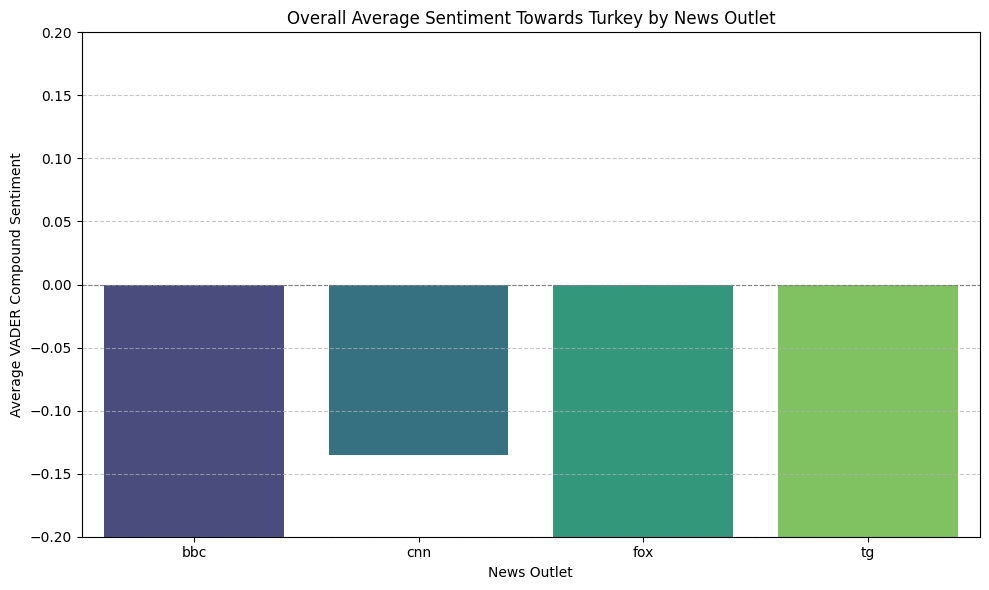

In [5]:
# %% [markdown]
# ### Cell 5: Overall Average Sentiment by News Outlet
# This cell generates a bar plot showing the average sentiment towards Turkey for each news outlet across the entire dataset.

# %%
if TEXT_COLUMN in df.columns: # Only proceed if sentiment analysis was performed
    print("\nVisualizing: Overall Average Sentiment by News Outlet")
    overall_sentiment_by_source = df.groupby('newsSource')['vader_sentiment'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='newsSource', y='vader_sentiment', data=overall_sentiment_by_source, palette='viridis')
    plt.title('Overall Average Sentiment Towards Turkey by News Outlet')
    plt.xlabel('News Outlet')
    plt.ylabel('Average VADER Compound Sentiment')
    plt.ylim(-0.2, 0.2) # Set consistent y-axis limits for better comparison
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for neutrality
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Overall sentiment visualization skipped because sentiment analysis was not performed.")


Visualizing: Temporal Sentiment Trends by News Outlet (Daily Average)


Streaming output truncated to the last 5000 lines.
<ipython-input-7-1479533544>:26: FutureWarning: Parsed string "9:51 AM EST, Tue February 11, 2020" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce') # Added errors='coerce'
<ipython-input-7-1479533544>:26: FutureWarning: Parsed string "1:22 PM EST, Wed December 20, 2017" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce') # Added errors='coerce'
<ipython-input-7-1479533544>:26: FutureWarning: Parsed string "10:29 AM EST, Sun November 20, 2022" inc

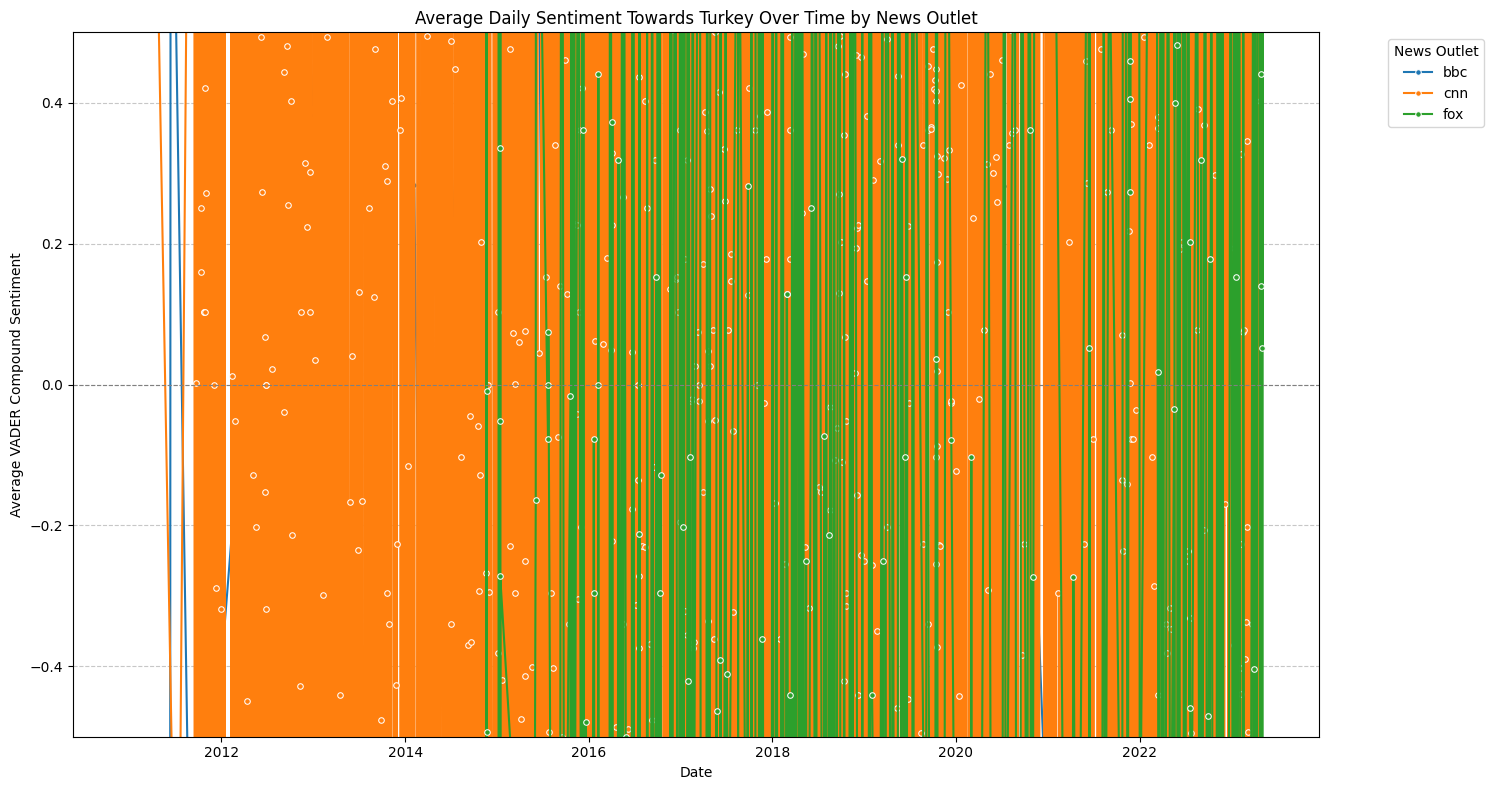


Analysis Complete! Review the plots above to see the sentiment trends.


In [7]:
# %% [markdown]
# ### Cell 7: Temporal Sentiment Trends by News Outlet (Daily Average)
# This cell plots the average daily sentiment towards Turkey for each news outlet over time.
#
# **IMPORTANT:** The `DATE_COLUMN` variable has been updated to `'date'` based on your dataset's available columns.

# %%
if TEXT_COLUMN in df.columns: # Only proceed if sentiment analysis was performed
    # IMPORTANT:
    # The DATE_COLUMN has been updated to 'date' as per your dataset's available columns.
    DATE_COLUMN = 'date' # UPDATED: Changed from 'published_date' to 'date'

    # The 'source' column in your dataset is likely 'newsSource', so using that for grouping.
    SOURCE_COLUMN = 'newsSource' # Adjusted to match your dataset's source column name

    if DATE_COLUMN not in df.columns:
        print(f"\nError: Date column '{DATE_COLUMN}' not found for temporal analysis.")
        print(f"Available columns are: {df.columns.tolist()}")
        print("Please update the 'DATE_COLUMN' variable with the correct column name.")
    elif SOURCE_COLUMN not in df.columns:
        print(f"\nError: Source column '{SOURCE_COLUMN}' not found for temporal analysis.")
        print(f"Available columns are: {df.columns.tolist()}")
        print("Please update the 'SOURCE_COLUMN' variable with the correct column name.")
    else:
        print("\nVisualizing: Temporal Sentiment Trends by News Outlet (Daily Average)")
        df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce') # Added errors='coerce'
        # Group by date and source, then calculate the mean sentiment for each day and source
        daily_sentiment_by_source = df.groupby([DATE_COLUMN, SOURCE_COLUMN])['vader_sentiment'].mean().reset_index()

        plt.figure(figsize=(15, 8))
        sns.lineplot(x=DATE_COLUMN, y='vader_sentiment', hue=SOURCE_COLUMN, data=daily_sentiment_by_source, marker='o', markersize=4, palette='tab10')
        plt.title('Average Daily Sentiment Towards Turkey Over Time by News Outlet')
        plt.xlabel('Date')
        plt.ylabel('Average VADER Compound Sentiment')
        plt.ylim(-0.5, 0.5) # Adjust limits for better visualization of sentiment range
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for neutrality
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='News Outlet', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
else:
    print("Temporal sentiment visualization skipped because sentiment analysis was not performed.")

print("\nAnalysis Complete! Review the plots above to see the sentiment trends.")

Removed 493 rows with invalid (NaT) dates from 'date'.

Visualizing: Temporal Sentiment Trends by News Outlet (Weekly Average)


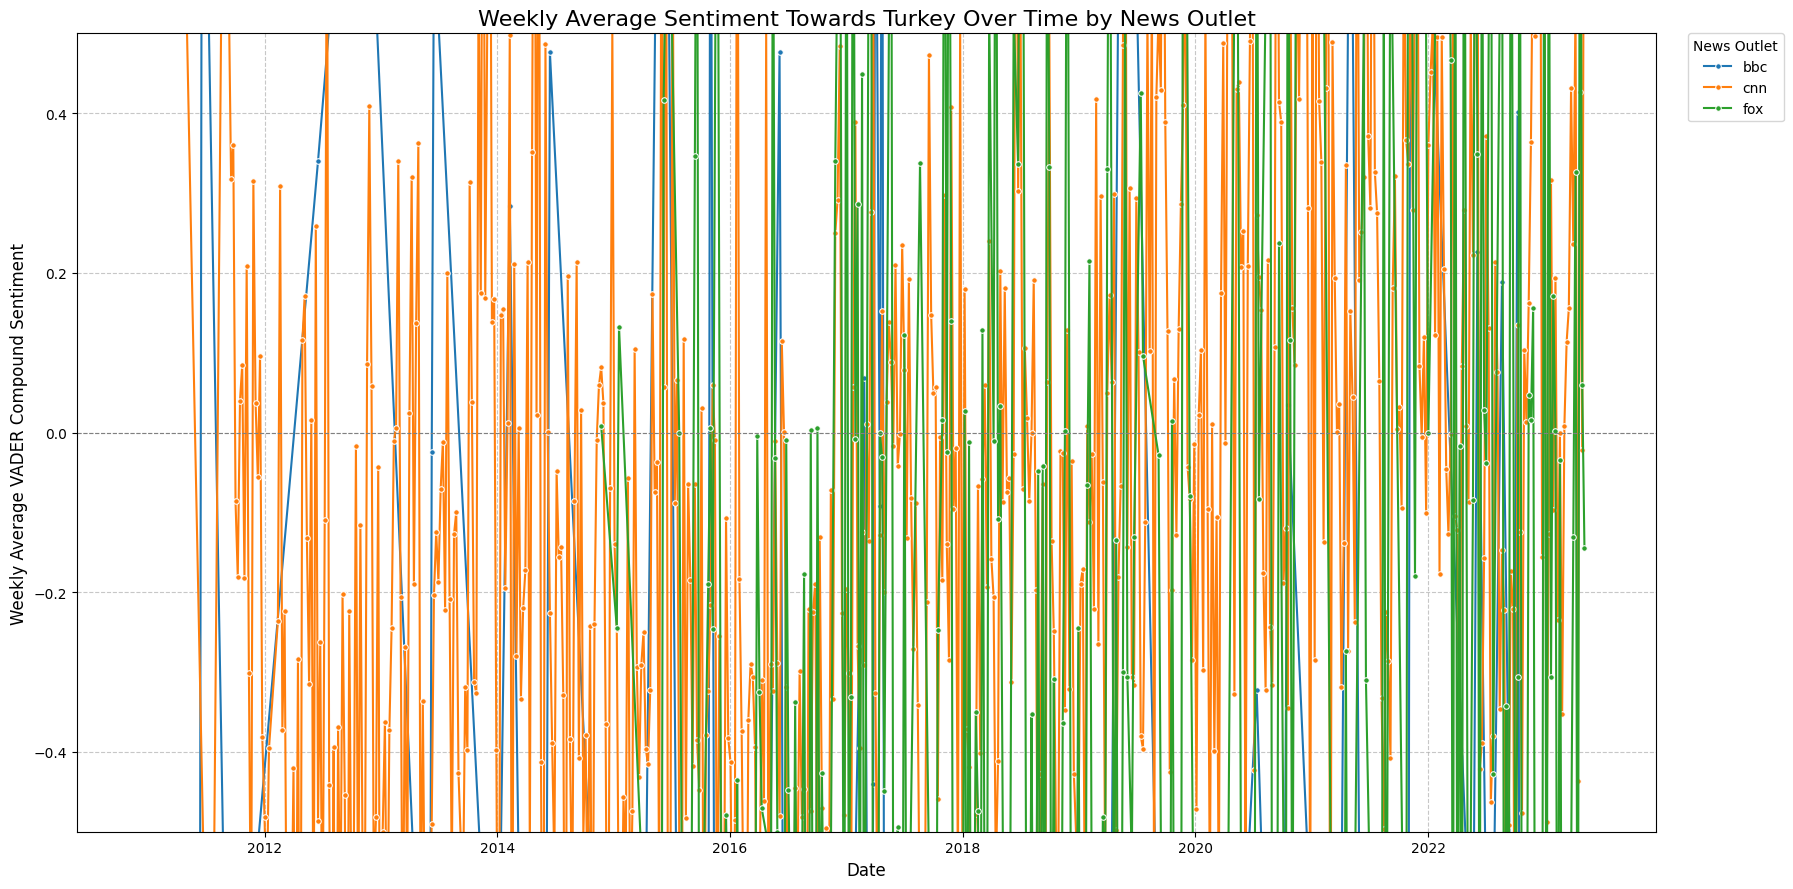


Analysis Complete! Review the plots above to see the sentiment trends.


In [9]:
# %% [markdown]
# ### Cell 8: Temporal Sentiment Trends by News Outlet (Weekly Average)
# This cell plots the **weekly average** of sentiment towards Turkey for each news outlet over time. Aggregating to a weekly average significantly reduces noise from sparse daily data, creating smoother, more interpretable "timelines" and highlighting long-term trends.
#
# **IMPORTANT:** The `DATE_COLUMN` and `SOURCE_COLUMN` variables are configured based on your dataset. This version robustly handles invalid dates and re-indexes the DataFrame to ensure proper time-series resampling.

# %%
# Ensure TEXT_COLUMN is set (it's set in Cell 3)
if 'cleaned_text' not in df.columns:
    print("Error: 'cleaned_text' column not found. Please ensure Cell 3 was run successfully.")
else:
    # IMPORTANT:
    # The DATE_COLUMN is 'date' and SOURCE_COLUMN is 'newsSource' as per your dataset.
    DATE_COLUMN = 'date'
    SOURCE_COLUMN = 'newsSource'

    # Convert DATE_COLUMN to datetime, coercing errors to NaT
    df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce')

    # --- FIX FOR IndexError: Remove rows with invalid dates directly from df and prepare for resampling ---
    initial_rows = len(df)
    # Drop rows with NaT values in the DATE_COLUMN
    df.dropna(subset=[DATE_COLUMN], inplace=True)
    rows_removed = initial_rows - len(df)
    if rows_removed > 0:
        print(f"Removed {rows_removed} rows with invalid (NaT) dates from '{DATE_COLUMN}'.")
    else:
        print(f"No invalid dates found in '{DATE_COLUMN}'.")

    # If the DataFrame becomes empty after dropping NaT values, stop.
    if df.empty:
        print(f"After cleaning, the DataFrame is empty. Cannot perform temporal analysis.")
    elif SOURCE_COLUMN not in df.columns:
        print(f"\nError: Source column '{SOURCE_COLUMN}' not found for temporal analysis.")
        print(f"Available columns are: {df.columns.tolist()}")
        print("Please update the 'SOURCE_COLUMN' variable with the correct column name.")
    else:
        print("\nVisualizing: Temporal Sentiment Trends by News Outlet (Weekly Average)")

        # Set the DATE_COLUMN as the DataFrame's index before resampling
        # This is the idiomatic way to use .resample()
        df_indexed = df.set_index(DATE_COLUMN).sort_index()

        # Calculate the weekly mean of sentiment for each news source
        # Now, .resample() can be called directly on the DataFrame after groupby
        weekly_sentiment_by_source = df_indexed.groupby(SOURCE_COLUMN)['vader_sentiment'].resample('W').mean().reset_index()

        plt.figure(figsize=(18, 9)) # Increased figure size for better readability of a long timeline
        sns.lineplot(x=DATE_COLUMN, y='vader_sentiment', hue=SOURCE_COLUMN, data=weekly_sentiment_by_source,
                     marker='o', markersize=4, linestyle='-', linewidth=1.5, palette='tab10')

        plt.title('Weekly Average Sentiment Towards Turkey Over Time by News Outlet', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Weekly Average VADER Compound Sentiment', fontsize=12)
        plt.ylim(-0.5, 0.5) # Keeping consistent y-axis limits, but you can remove for auto-scaling
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for neutrality
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='News Outlet', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Adjust legend position
        plt.tight_layout()
        plt.show()

print("\nAnalysis Complete! Review the plots above to see the sentiment trends.")

No invalid dates found in 'date'.

Visualizing: Temporal Sentiment Trends by News Outlet (Two-Yearly Average)


<ipython-input-11-3992542396>:43: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_period_range = pd.date_range(start=min_date, end=max_date, freq='2Y') # freq='2Y' for two years
<ipython-input-11-3992542396>:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  two_yearly_avg_sentiment = df_cleaned.set_index(DATE_COLUMN).groupby(SOURCE_COLUMN)['vader_sentiment'].resample('2Y').mean().reset_index()


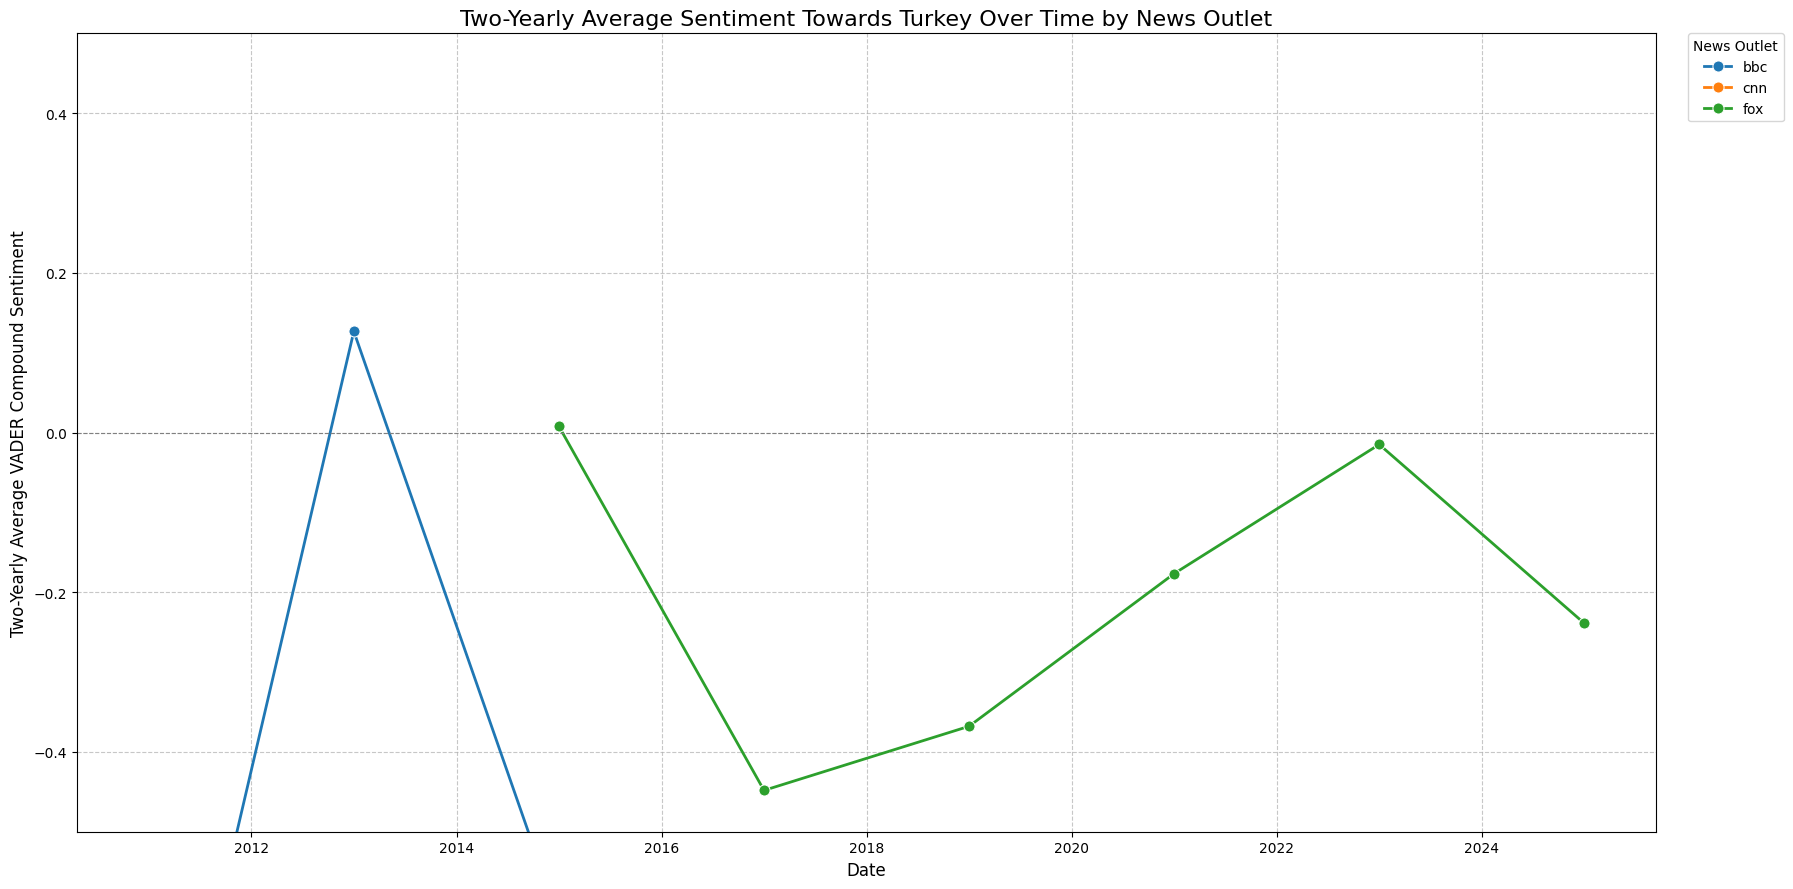


Analysis Complete! Review the plots above to see the sentiment trends.


In [11]:
# %% [markdown]
# ### Cell 10: Temporal Sentiment Trends by News Outlet (Two-Yearly Average)
# This cell plots the **two-yearly average** of sentiment towards Turkey for each news outlet over time. Aggregating to a two-year average reveals broader, long-term trends and further smooths the timeline, making it easier to identify significant shifts in sentiment over extended periods.
#
# **IMPORTANT:** The `DATE_COLUMN` and `SOURCE_COLUMN` variables are configured based on your dataset. This version robustly handles invalid dates and aggregates data into two-year bins.

# %%
# Ensure TEXT_COLUMN is set (it's set in Cell 3)
if 'cleaned_text' not in df.columns:
    print("Error: 'cleaned_text' column not found. Please ensure Cell 3 was run successfully.")
else:
    # IMPORTANT:
    # The DATE_COLUMN is 'date' and SOURCE_COLUMN is 'newsSource' as per your dataset.
    DATE_COLUMN = 'date'
    SOURCE_COLUMN = 'newsSource'

    # Convert DATE_COLUMN to datetime, coercing errors to NaT
    df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce')

    # --- Remove rows with invalid dates directly from df and prepare for resampling ---
    initial_rows = len(df)
    df_cleaned = df.dropna(subset=[DATE_COLUMN]).copy() # Use df_cleaned to avoid modifying df directly mid-process
    rows_removed = initial_rows - len(df_cleaned)
    if rows_removed > 0:
        print(f"Removed {rows_removed} rows with invalid (NaT) dates from '{DATE_COLUMN}'.")
    else:
        print(f"No invalid dates found in '{DATE_COLUMN}'.")

    # If the DataFrame becomes empty after cleaning, stop.
    if df_cleaned.empty:
        print(f"After cleaning, the DataFrame is empty. Cannot perform temporal analysis.")
    elif SOURCE_COLUMN not in df_cleaned.columns:
        print(f"\nError: Source column '{SOURCE_COLUMN}' not found for temporal analysis.")
        print(f"Available columns are: {df_cleaned.columns.tolist()}")
        print("Please update the 'SOURCE_COLUMN' variable with the correct column name.")
    else:
        print("\nVisualizing: Temporal Sentiment Trends by News Outlet (Two-Yearly Average)")

        # --- FIX FOR Two-Yearly: Robustly define min_date and max_date for resampling ---
        # Convert to PeriodIndex ('2Y' for two years) and then get start_time/end_time
        min_date = df_cleaned[DATE_COLUMN].min().to_period('2Y').start_time
        max_date = df_cleaned[DATE_COLUMN].max().to_period('2Y').end_time
        full_period_range = pd.date_range(start=min_date, end=max_date, freq='2Y') # freq='2Y' for two years
        # --- END FIX ---

        # Get unique news sources
        unique_sources = df_cleaned[SOURCE_COLUMN].unique()

        # Prepare an empty DataFrame to hold all possible period-source combinations
        all_combinations = pd.MultiIndex.from_product([full_period_range, unique_sources], names=[DATE_COLUMN, SOURCE_COLUMN]).to_frame(index=False)

        # Aggregate sentiment to two-yearly averages for each source
        # Set DATE_COLUMN as index temporarily for resampling, then groupby SOURCE_COLUMN
        # The '2Y' frequency aligns to the end of the two-year period
        two_yearly_avg_sentiment = df_cleaned.set_index(DATE_COLUMN).groupby(SOURCE_COLUMN)['vader_sentiment'].resample('2Y').mean().reset_index()

        # Merge the aggregated sentiment with the full combinations DataFrame
        final_plot_data = pd.merge(all_combinations, two_yearly_avg_sentiment,
                                   on=[DATE_COLUMN, SOURCE_COLUMN], how='left')

        # Sort the data for proper line plotting
        final_plot_data.sort_values(by=[SOURCE_COLUMN, DATE_COLUMN], inplace=True)


        plt.figure(figsize=(18, 9)) # Keep large figure size for clear timeline
        sns.lineplot(x=DATE_COLUMN, y='vader_sentiment', hue=SOURCE_COLUMN, data=final_plot_data,
                     marker='o', markersize=8, linestyle='-', linewidth=2, palette='tab10', # Increased marker/line size for fewer points
                     errorbar=None)

        plt.title('Two-Yearly Average Sentiment Towards Turkey Over Time by News Outlet', fontsize=16) # Updated title
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Two-Yearly Average VADER Compound Sentiment', fontsize=12) # Updated y-axis label
        plt.ylim(-0.5, 0.5) # Keeping consistent y-axis limits, but you can remove for auto-scaling
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for neutrality
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='News Outlet', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
        plt.tight_layout()
        plt.show()

print("\nAnalysis Complete! Review the plots above to see the sentiment trends.")

No invalid dates found in 'date'.

Visualizing: Temporal Sentiment Trends by News Outlet (Annually Average)


<ipython-input-12-2623110132>:43: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_period_range = pd.date_range(start=min_date, end=max_date, freq='Y') # freq='Y' for annually
<ipython-input-12-2623110132>:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annually_avg_sentiment = df_cleaned.set_index(DATE_COLUMN).groupby(SOURCE_COLUMN)['vader_sentiment'].resample('Y').mean().reset_index()


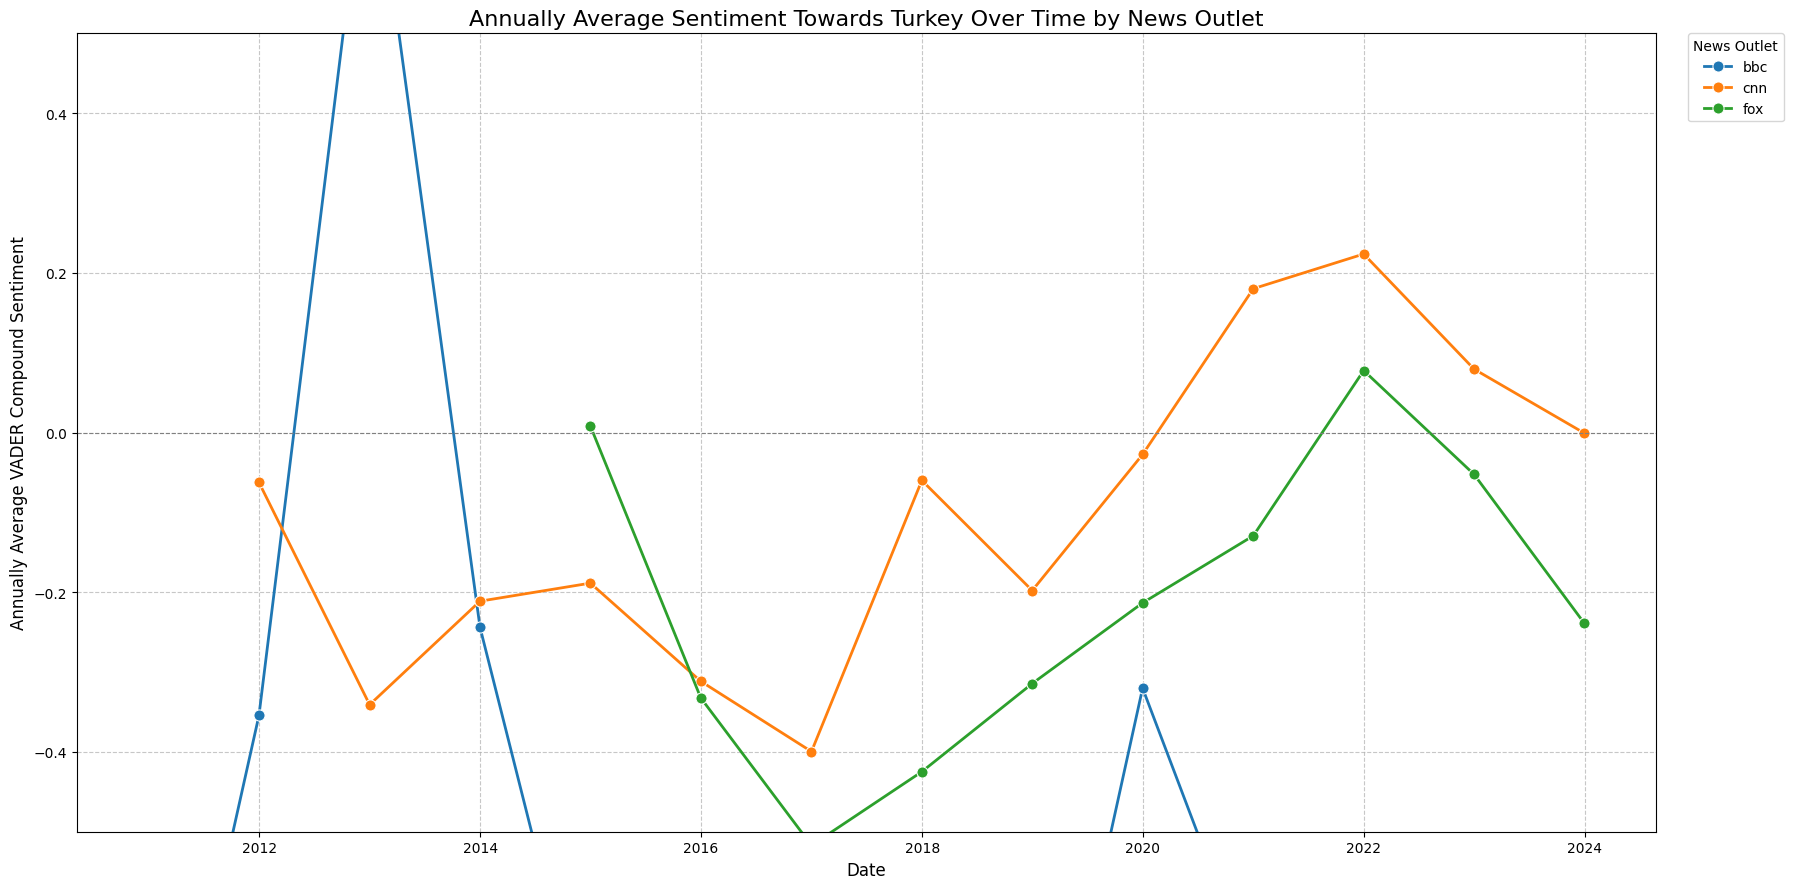


Analysis Complete! Review the plots above to see the sentiment trends.


In [12]:
# %% [markdown]
# ### Cell 11: Temporal Sentiment Trends by News Outlet (Annually Average)
# This cell plots the **annually average** of sentiment towards Turkey for each news outlet over time. Aggregating to an annual average provides a clear long-term perspective and further smooths the timeline, highlighting major yearly shifts in sentiment.
#
# **IMPORTANT:** The `DATE_COLUMN` and `SOURCE_COLUMN` variables are configured based on your dataset. This version robustly handles invalid dates and aggregates data into annual bins.

# %%
# Ensure TEXT_COLUMN is set (it's set in Cell 3)
if 'cleaned_text' not in df.columns:
    print("Error: 'cleaned_text' column not found. Please ensure Cell 3 was run successfully.")
else:
    # IMPORTANT:
    # The DATE_COLUMN is 'date' and SOURCE_COLUMN is 'newsSource' as per your dataset.
    DATE_COLUMN = 'date'
    SOURCE_COLUMN = 'newsSource'

    # Convert DATE_COLUMN to datetime, coercing errors to NaT
    df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN], errors='coerce')

    # --- Remove rows with invalid dates directly from df and prepare for resampling ---
    initial_rows = len(df)
    df_cleaned = df.dropna(subset=[DATE_COLUMN]).copy() # Use df_cleaned to avoid modifying df directly mid-process
    rows_removed = initial_rows - len(df_cleaned)
    if rows_removed > 0:
        print(f"Removed {rows_removed} rows with invalid (NaT) dates from '{DATE_COLUMN}'.")
    else:
        print(f"No invalid dates found in '{DATE_COLUMN}'.")

    # If the DataFrame becomes empty after cleaning, stop.
    if df_cleaned.empty:
        print(f"After cleaning, the DataFrame is empty. Cannot perform temporal analysis.")
    elif SOURCE_COLUMN not in df_cleaned.columns:
        print(f"\nError: Source column '{SOURCE_COLUMN}' not found for temporal analysis.")
        print(f"Available columns are: {df_cleaned.columns.tolist()}") # Use df_cleaned here
        print("Please update the 'SOURCE_COLUMN' variable with the correct column name.")
    else:
        print("\nVisualizing: Temporal Sentiment Trends by News Outlet (Annually Average)")

        # --- FIX FOR Annually: Robustly define min_date and max_date for resampling ---
        # Convert to PeriodIndex ('Y' for annually) and then get start_time/end_time
        min_date = df_cleaned[DATE_COLUMN].min().to_period('Y').start_time
        max_date = df_cleaned[DATE_COLUMN].max().to_period('Y').end_time
        full_period_range = pd.date_range(start=min_date, end=max_date, freq='Y') # freq='Y' for annually
        # --- END FIX ---

        # Get unique news sources
        unique_sources = df_cleaned[SOURCE_COLUMN].unique()

        # Prepare an empty DataFrame to hold all possible period-source combinations
        all_combinations = pd.MultiIndex.from_product([full_period_range, unique_sources], names=[DATE_COLUMN, SOURCE_COLUMN]).to_frame(index=False)

        # Aggregate sentiment to annually averages for each source
        # Set DATE_COLUMN as index temporarily for resampling, then groupby SOURCE_COLUMN
        # The 'Y' frequency aligns to the end of the year
        annually_avg_sentiment = df_cleaned.set_index(DATE_COLUMN).groupby(SOURCE_COLUMN)['vader_sentiment'].resample('Y').mean().reset_index()

        # Merge the aggregated sentiment with the full combinations DataFrame
        final_plot_data = pd.merge(all_combinations, annually_avg_sentiment,
                                   on=[DATE_COLUMN, SOURCE_COLUMN], how='left')

        # Sort the data for proper line plotting
        final_plot_data.sort_values(by=[SOURCE_COLUMN, DATE_COLUMN], inplace=True)


        plt.figure(figsize=(18, 9)) # Keep large figure size for clear timeline
        sns.lineplot(x=DATE_COLUMN, y='vader_sentiment', hue=SOURCE_COLUMN, data=final_plot_data,
                     marker='o', markersize=8, linestyle='-', linewidth=2, palette='tab10', # Retaining marker/line size for clear points
                     errorbar=None)

        plt.title('Annually Average Sentiment Towards Turkey Over Time by News Outlet', fontsize=16) # Updated title
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Annually Average VADER Compound Sentiment', fontsize=12) # Updated y-axis label
        plt.ylim(-0.5, 0.5) # Keeping consistent y-axis limits, but you can remove for auto-scaling
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for neutrality
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='News Outlet', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
        plt.tight_layout()
        plt.show()

print("\nAnalysis Complete! Review the plots above to see the sentiment trends.")